# Exploratory Data Analysis
_La Fundación Bill & Melinda Gates dispone un programa de Servicios Financieros dirigido a las personas más
desfavorecidas del planeta. Con el objetivo de conocer las necesidades de la población, la Fundación ha realizado una
encuesta sobre diferentes aspectos de la población India.
El datasets que facilitamos para la prueba contiene información demográfica y de comportamiento de una muestra
representativa de encuestados de India y su uso de servicios financieros y móviles tradicionales. Las encuestas han sido
realizadas por InterMedia para ayudar a las personas más pobres del mundo a aprovechar los teléfonos móviles y otras
tecnologías digitales para acceder a herramientas financieras y participar más plenamente en sus economías locales. Las
mujeres en estas comunidades, en particular, a menudo suelen estar excluidas del sistema financiero formal. Al predecir el
género, y los patrones de comportamiento de hombres y mujeres es clave para la extraiga a seguir por los servicios
financieros. Las conclusiones de estas investigaciones pueden influir en los planes de mejora de estas barreras que
disponen las mujeres en las economías en desarrollo y permitirá desarrollar nuevas herramientas financieras que ayude a
las mujeres y a sus familias a salir de la pobreza_

Let's go to explore our dataset in order to find out more about it

1. Target
2. There are variables which are in the dictionary but are not in the dataset
3. Age
4. Sociodemographic
5. Mobile Phone
6. Financial

In [1]:
##################################################
###### Import Libraries
##################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 2000)

##################################################
###### Import Data
##################################################

path_train = '../data/train.csv'
path_test = '../data/test.csv'
path_dict = '../data/WiDS data dictionary v2.xlsx'
train = pd.read_csv(path_train,low_memory=False)
test = pd.read_csv(path_test,low_memory=False)
dic = pd.read_excel(path_dict) # install xlrd > 1.0.0

print('Train Shape: %s\nTest Shape: %s\nDictionary Shape: %s'%(train.shape,test.shape,dic.shape))
null_train = train.isnull().sum().sum()/(train.shape[0]*train.shape[1])
null_test = test.isnull().sum().sum()/(test.shape[0]*test.shape[1])
print('%MissingValuesTrain:',round(null_train,2))
print('%MissingValuesTest:',round(null_test,2))

Train Shape: (18255, 1235)
Test Shape: (27285, 1234)
Dictionary Shape: (1105, 3)
%MissingValuesTrain: 0.7
%MissingValuesTest: 0.7


In [2]:
train.head()

train_id  AA3  AA4  AA5  AA6     AA7  AA14  AA15   DG1  is_female  DG3  \
0         0    3   32  3.0  NaN  323011  3854   481  1975          1    3   
1         1    2   26  NaN  8.0  268131  2441   344  1981          1    8   
2         2    1   16  NaN  7.0  167581   754   143  1995          1    3   
3         3    4   44  5.0  NaN  445071  5705   604  1980          1    3   
4         4    4   43  NaN  6.0  436161  5645   592  1958          1    3   

   DG3A DG3A_OTHERS  DG4  DG4_OTHERS  DG5_1  DG5_2  DG5_3  DG5_4  DG5_5  \
0     4         NaN    5         NaN      1      2      2      2      2   
1     4         NaN    5         NaN      2      2      2      2      2   
2     2         NaN    2         NaN      1      2      2      2      2   
3     4         NaN    5         NaN      1      2      2      2      2   
4     4         NaN    6         NaN      1      2      2      2      1   

   DG5_6  DG5_7  DG5_8  DG5_9  DG5_10  DG5_11  DG5_96  DG6  DG8a  DG8b  DG8c  \
0      1      1      2      2       2       2       2    2     4     1     0   
1      1      1      2      2       1       2       2    2     4     1     0   
2      1      1      2      2       1       2       2    7     4     2     2   
3      1      1      2      2       2       2       2    2     2     2    99   
4      1      1      2      2       2       2       2    2    99     0     0   

   DG9a  DG9b  DG9c  DG10b  DG10c  DG11b  DG11c  DG12B_1  DG12B_2  DG12C_1  \
0   4.0   0.0   NaN    1.0    NaN    1.0    NaN      1.0      2.0      NaN   
1   2.0   0.0   NaN    1.0    NaN    1.0    NaN      1.0      2.0      NaN   
2   1.0   0.0   0.0    2.0    0.0    2.0    NaN      1.0      2.0      NaN   
3   2.0   2.0   NaN    2.0    NaN    2.0    NaN      1.0      2.0      NaN   
4   NaN   NaN   NaN    NaN    NaN    NaN    NaN      NaN      NaN      NaN   

   DG12C_2  DG13_1  DG13_2  DG13_3  DG13_4  DG13_5  DG13_96  DG13_7  \
0      NaN     NaN     NaN     NaN     NaN     NaN      NaN     NaN   
1      NaN     NaN     NaN     NaN     NaN     NaN      NaN     NaN   
2      NaN     NaN     NaN     NaN     NaN     NaN      NaN     NaN   
3      NaN     NaN     NaN     NaN     NaN     NaN      NaN     NaN   
4      NaN     NaN     NaN     NaN     NaN     NaN      NaN     NaN   

  DG13_OTHERS  DG14 DG14_OTHERS  DL0  DL1 DL1_OTHERS   DL2 DL2_23_OTHERS  \
0         NaN   NaN         NaN    1    1        NaN  22.0           NaN   
1         NaN   NaN         NaN    2    7        NaN   NaN           NaN   
2         NaN   NaN         NaN    2    7        NaN   NaN           NaN   
3         NaN   NaN         NaN    2    7        NaN   NaN           NaN   
4         NaN   NaN         NaN    2    7        NaN   NaN           NaN   

  DL2_96_OTHERS  DL3  DL4_1  DL4_2  DL4_3  DL4_4  DL4_5  DL4_6  DL4_7  DL4_8  \
0           NaN  1.0      2      2      2      2      2      2      2      2   
1           NaN  NaN      2      2      2      2      2      2      2      2   
2           NaN  NaN      2      2      1      2      1      2      2      2   
3           NaN  NaN      2      2      2      2      2      2      2      2   
4           NaN  NaN      2      2      2      2      2      2      2      2   

   DL4_9  DL4_10  DL4_11  DL4_12  DL4_13  DL4_14  DL4_15  DL4_16  DL4_17  \
0      2       2       2       2       2       2       2       2       2   
1      2       2       2       2       2       2       2       2       2   
2      2       2       2       2       2       2       2       2       2   
3      2       2       2       2       2       2       2       2       2   
4      2       2       2       2       2       2       2       2       2   

   DL4_18  DL4_19  DL4_20  DL4_21  DL4_22  DL4_23  DL4_96  DL4_99 DL4_OTHERS  \
0       2       2       2       2       2       2       2       1        NaN   
1       2       2       2       2       2       2       2       1        NaN   
2       2       2       2       2       2       2       2       2        NaN 

In [3]:
train['gender'] = np.where(train['is_female']==1,'Female','Male')

### 1. Target

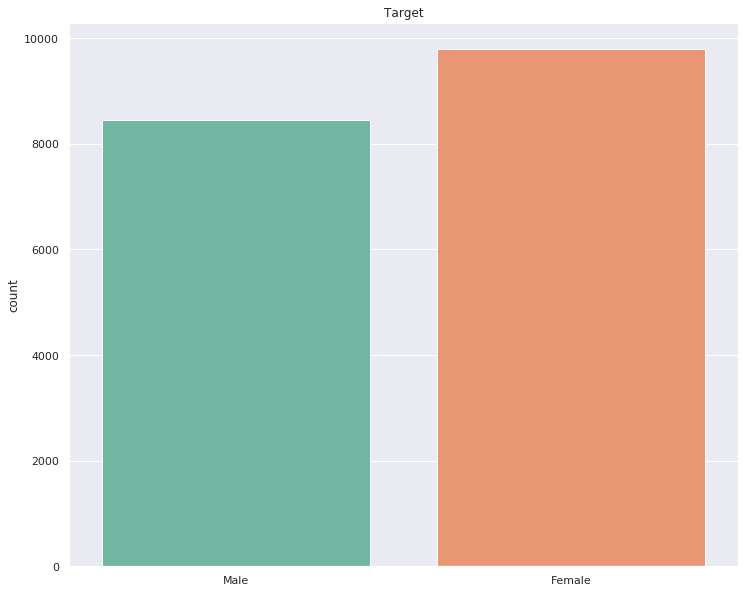

In [12]:
fig, ax = plt.subplots(1,1, figsize = (12,10))
sns.set()
g =sns.countplot(x='is_female',data=train, palette="Set2")
g.set(xticks=range(2), xticklabels=['Male','Female'])
plt.title('Target')
plt.xlabel('');
# fig = g.get_figure()
# fig.savefig("../images/target.png")

In [6]:
train['is_female'].value_counts()

1    9805
0    8450
Name: is_female, dtype: int64

___Target___
- Female: 9805
- Male:   8450

### 2. Features which are in the Dataset but not in our Dictionary 

- There are 160 Features which we don't know what they mean 
- To protect privacy?


In [7]:
# Dictionary Features
dict_list = dic['Column Name'].values.tolist()
# Train Dataset Features
dataset_list = train.columns.values.tolist()

no_dict_list = []
k = 0
for i in dataset_list:
    if i not in dict_list:
        no_dict_list.append(i)
print('Length:',len(no_dict_list))
no_dict_list[0:10]

Length: 161


['train_id',
 'AA4',
 'AA7',
 'AA14',
 'AA15',
 'DG3A_OTHERS',
 'DG4_OTHERS',
 'DG10b',
 'DG10c',
 'DG11b']

### 3. Age

- DG1 looks like birth year
- A lot of people between 20 years old, and 40 years old
- minimum  18 years old
- median   38 years old
- maximum  102 years old

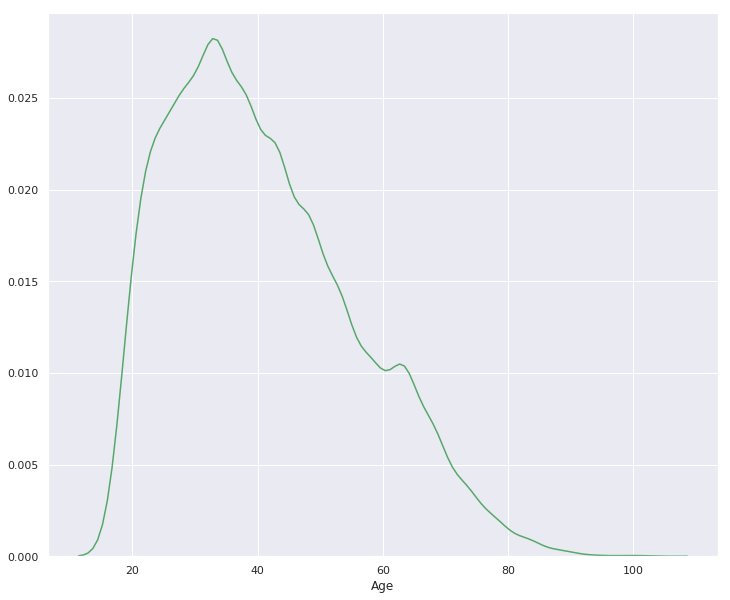

In [11]:
# I suppose this survey has been made this year
fig, ax = plt.subplots(1,1, figsize = (12,10))
train['Age'] = 2019 - train['DG1'] 
ax = sns.distplot(train['Age'],color='g', hist=False)
# fig = ax.get_figure()
# fig.savefig("../images/age.png");

### 4. Sociodemographic info

#### 4.1 DL0:Who is the main income earner in your household?
- 1: Myself
- 2: Somebody else

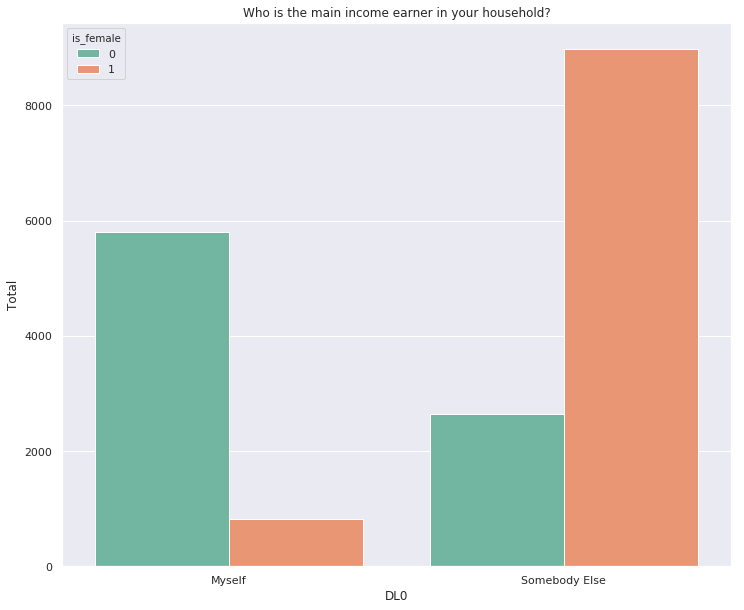

In [13]:
fig, ax = plt.subplots(1,1, figsize = (12,10))
ax = sns.countplot(x = 'DL0', hue = 'is_female', palette = 'Set2', data = train)
ax.set(title = 'Who is the main income earner in your household?', 
       xlabel = 'DL0', ylabel = 'Total')
ax.set(xticks=range(2), xticklabels=['Myself','Somebody Else'])
plt.show()
# fig = ax.get_figure()
# fig.savefig("../images/income.png");

#### 4.2 DG6.How are you related to the household head? 

- 1=Myself
- 2=Spouse
- 3=Son/Daughter
- 4=Father/Mother
- 5=Sister/Brother
- 6=Grandchild
- 7=Other relative
- 9=Other non-relative
- 99=DK

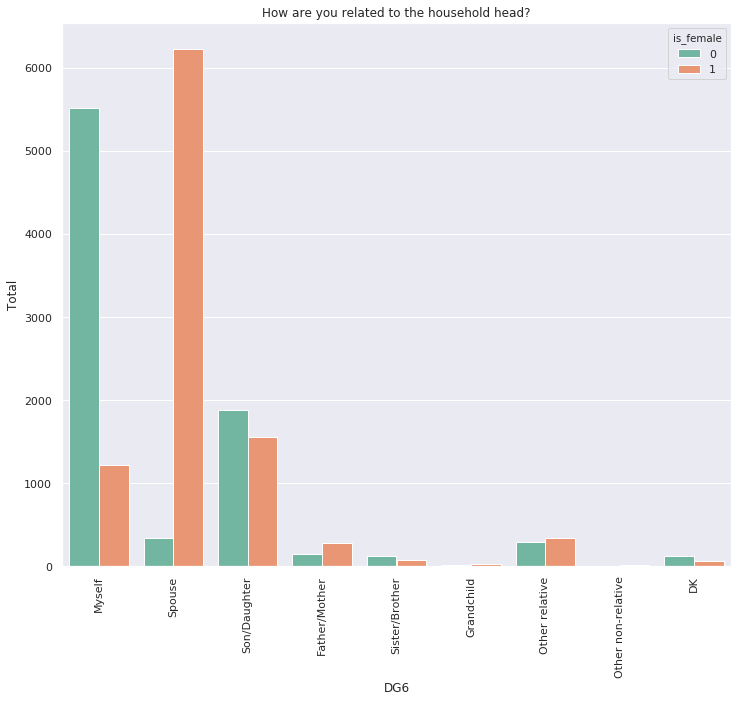

In [14]:
fig, ax = plt.subplots(1,1, figsize = (12,10))
ax = sns.countplot(x = 'DG6', hue = 'is_female', palette = 'Set2', data = train)
ax.set(title = 'How are you related to the household head?', 
       xlabel = 'DG6', ylabel = 'Total')
ax.set_xticklabels(labels=['Myself','Spouse','Son/Daughter','Father/Mother','Sister/Brother','Grandchild','Other relative','Other non-relative','DK'], rotation=90)
plt.show()
fig = ax.get_figure()
fig.savefig("../images/related.png");

#### 4.3 DG3: What is your marital status?

- 1=Single/ Not married 
- 2=Polygamously married (i.e., has multiple spouses)
- 3=Monogamously married
- 4=Divorced
- 5=Separated
- 6=Widow/widower
- 7=Living together with my partner but not married
- 8=Living together/cohabitating 
- 96=Other (Specify)
- 99=DK

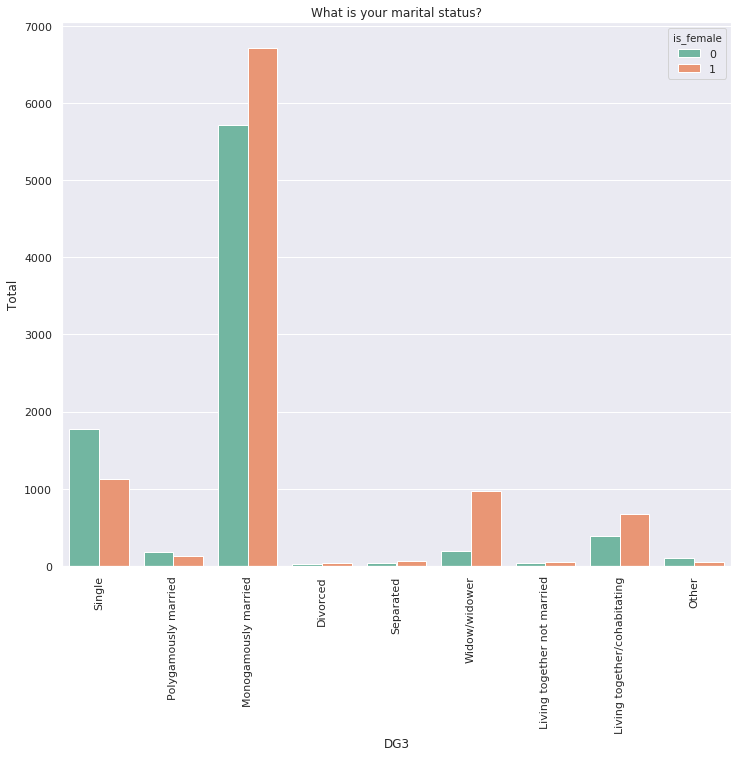

In [20]:
fig, ax = plt.subplots(1,1, figsize = (12,10))
ax = sns.countplot(x = 'DG3', hue = 'is_female', palette = 'Set2', data = train)
ax.set(title = 'What is your marital status?', 
       xlabel = 'DG3', ylabel = 'Total')
ax.set_xticklabels(labels=['Single','Polygamously married','Monogamously married','Divorced','Separated','Widow/widower','Living together not married','Living together/cohabitating','Other','DK'], rotation=90)
plt.show()
fig = ax.get_figure()
fig.savefig("../images/marital.png");

#### 4.4 DG4: What is your highest level of education?

- 1=Illiterate- no formal education
- 2=Literate without formal education ( knows how to read and write but has not formally studied in a school)
- 3=Below Primary Schooling (Schooling till standard 4th) 
- 4=Primary (Schooling till standard 5th)
- 5=Middle (Schooling till standard 6th-8th)
- 6=Matriculation/Secondary (schooling till standard 10th )
- 7=Higher secondary (schooling till standard 12th )/ Intermediate/Pre University/ Senior Secondary
- 8=Non technical diploma or certificate not equal to degree
- 9=Technical diploma or certificate not equal to degree
- 10=Graduate
- 11=Post Graduate and above
- 96=Other (Specify)
- 99=DK


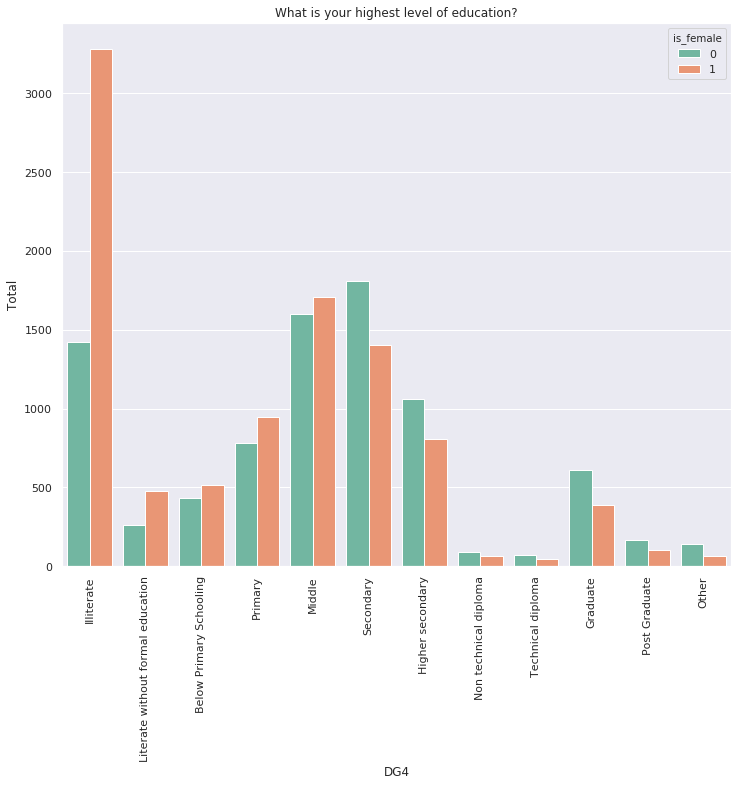

In [21]:
fig, ax = plt.subplots(1,1, figsize = (12,10))
ax = sns.countplot(x = 'DG4', hue = 'is_female', palette = 'Set2', data = train)
ax.set(title = 'What is your highest level of education?', 
       xlabel = 'DG4', ylabel = 'Total')
ax.set_xticklabels(labels=['Illiterate','Literate without formal education','Below Primary Schooling','Primary','Middle','Secondary','Higher secondary','Non technical diploma','Technical diploma','Graduate','Post Graduate','Other','DK'], rotation=90)
plt.show()
fig = ax.get_figure()
fig.savefig("../images/education.png");

In [13]:
train.groupby(['DG4','is_female'])['Age'].agg({'median','mean','max','min'})

max  median  min       mean
DG4 is_female                             
1   0           91      49   18  49.939649
    1          102      46   19  47.470302
2   0           93      48   20  48.511538
    1           88      42   18  43.792453
3   0           98      49   19  49.608796
    1           95      39   19  41.974757
4   0           90      43   18  45.346939
    1           88      38   18  39.737288
5   0          100      39   18  41.490306
    1           83      34   18  36.148126
6   0           85      38   18  39.135434
    1           75      33   18  34.091946
7   0           83      31   18  34.564440
    1           79      28   18  30.688119
8   0           68      29   20  32.528090
    1           69      25   20  28.200000
9   0           65      29   20  33.041667
    1           69      25   20  27.888889
10  0           81      34   21  37.263072
    1           76      29   21  32.808184
11  0           90      37   23  40.408537
    1           71      29   23  33.445545
99  0           78      38   21  39.609929
    1           78      39   22  40.953846

### 5. Mobile Phone

#### 5.1 MT2.Do you personally own a mobile phone?
- 1=Yes
- 2=No


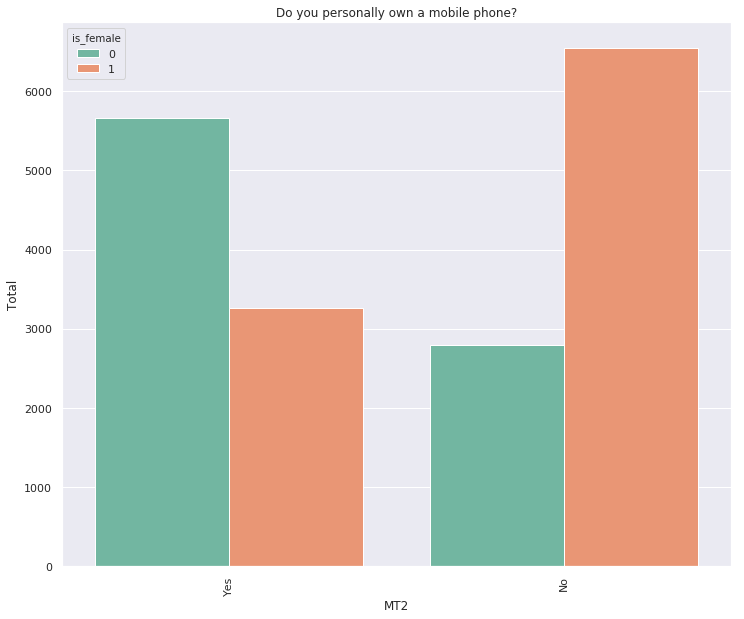

In [25]:
fig, ax = plt.subplots(1,1, figsize = (12,10))
ax = sns.countplot(x = 'MT2', hue = 'is_female', palette = 'Set2', data = train)
ax.set(title = 'Do you personally own a mobile phone?', 
       xlabel = 'MT2', ylabel = 'Total')
ax.set_xticklabels(labels=['Yes','No'], rotation=90)
plt.show()
fig = ax.get_figure()
fig.savefig("../images/mobile.png");

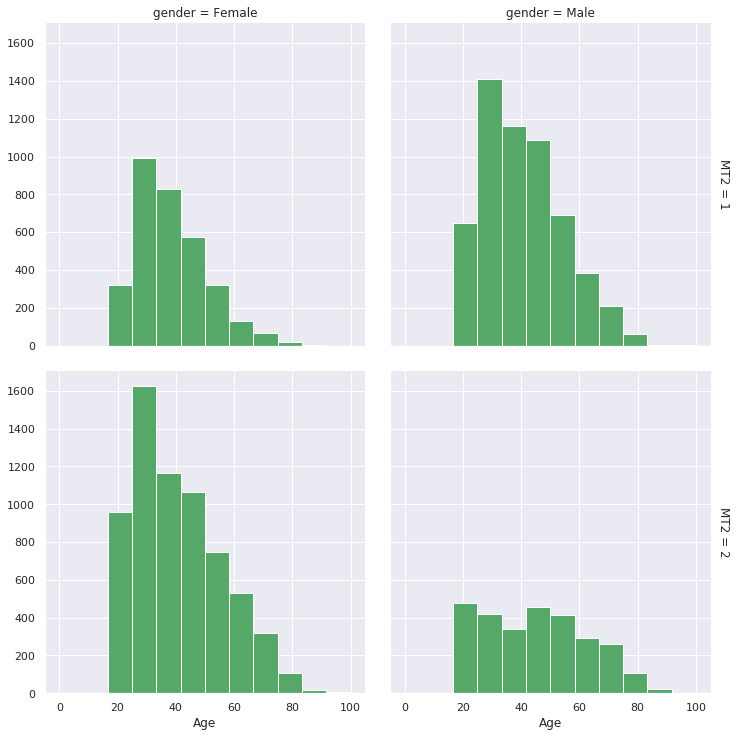

In [29]:
sns.set(style="darkgrid")
g = sns.FacetGrid(train, row="MT2", col="gender", margin_titles=True,height=5.2)
bins = np.linspace(0, 100, 13)
g.map(plt.hist, "Age", color="g", bins=bins);
g.savefig("../images/mobile_age.png");

#### 5.1 MT1A:Who decides on who should have a phone in your household?


- 1=Myself
- 2=My spouse 
- 3=My parents/guardian
- 4=My child (children) 
- 5=Brother
- 8=Sister
- 99=DK


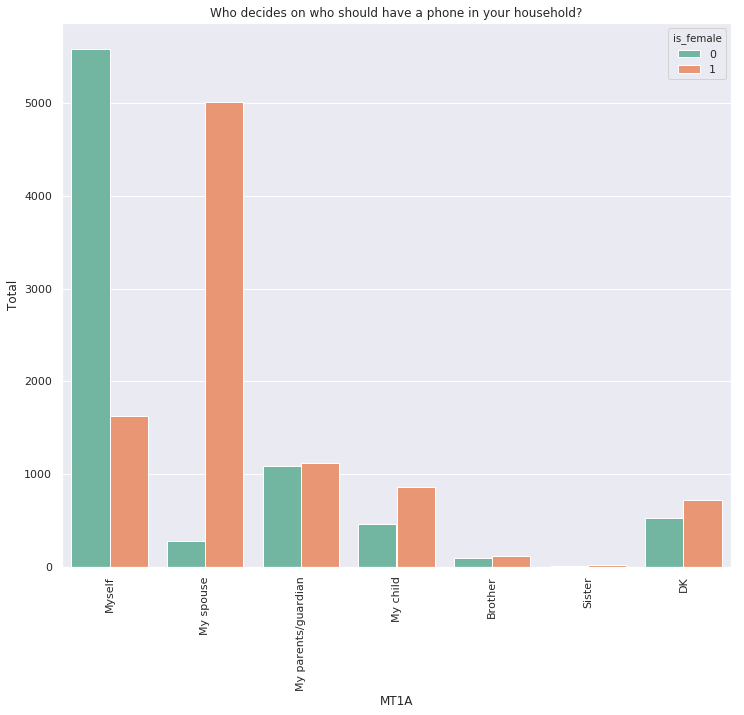

In [24]:
fig, ax = plt.subplots(1,1, figsize = (12,10))
ax = sns.countplot(x = 'MT1A', hue = 'is_female', palette = 'Set2', data = train)
ax.set(title = 'Who decides on who should have a phone in your household?', 
       xlabel = 'MT1A', ylabel = 'Total')
ax.set_xticklabels(labels=['Myself','My spouse','My parents/guardian','My child','Brother','Sister','DK'], rotation=90)
plt.show()

### 6. Financial

#### 6.1 FF1. Do you personally have a bank account that is registered in your name? 
- 1 Yes
- 2 No

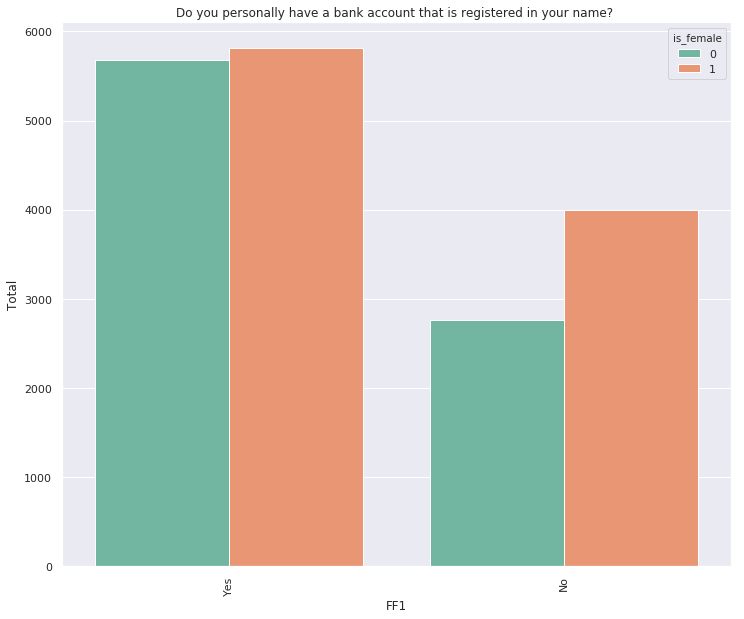

In [48]:
fig, ax = plt.subplots(1,1, figsize = (12,10))
ax = sns.countplot(x = 'FF1', hue = 'is_female', palette = 'Set2', data = train)
ax.set(title = 'Do you personally have a bank account that is registered in your name? ', 
       xlabel = 'FF1', ylabel = 'Total')
ax.set_xticklabels(labels=['Yes','No'], rotation=90)
plt.show()

#### 6.2 FL4:What or who do you depend on the most for financial advice?

- 1=Myself only
- 2=Spouse
- 3=Bank
- 4=Insurance company
- 5=MFI
- 6=Informal Savings/Lending groups
- 7=Religious institutes
- 8=Friends, family, neighbors
- 9=Radio
- 10=TV
- 11=Newspapers, other printed media
- 12=Big adverts, billboards
- 13=Leaflet from a financial institution
- 14=NGO workshop/seminar
- 15=Local government
- 16=Internet
- 17=Supernatural being
- 96=Other (Specify)
- 99=DK


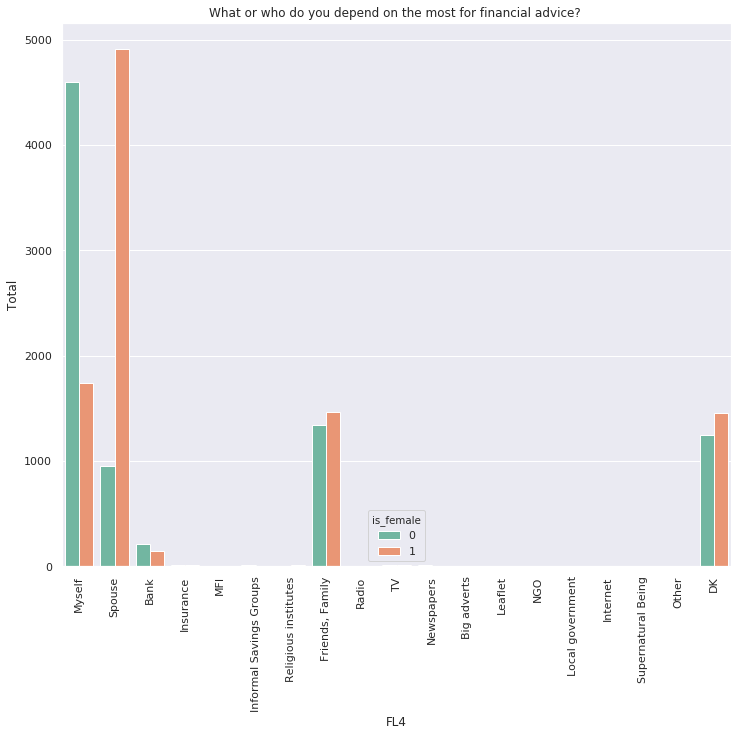

In [50]:
fig, ax = plt.subplots(1,1, figsize = (12,10))
ax = sns.countplot(x = 'FL4', hue = 'is_female', palette = 'Set2', data = train)
ax.set(title = 'What or who do you depend on the most for financial advice? ', 
       xlabel = 'FL4', ylabel = 'Total')
ax.set_xticklabels(labels=['Myself','Spouse','Bank','Insurance','MFI','Informal Savings Groups','Religious institutes','Friends, Family','Radio','TV','Newspapers','Big adverts','Leaflet','NGO','Local government','Internet','Supernatural Being','Other','DK'], rotation=90)
plt.show()